In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score
%matplotlib inline

## Loading Data

In [2]:
path = '../image64/'

In [3]:
X_train = np.load(path + 'X_train.npy')
y_train = np.load(path + 'y_train.npy')

X_validate = np.load(path + 'X_validate.npy')
y_validate = np.load(path + 'y_validate.npy')

X_test = np.load(path + 'X_test.npy')
y_test = np.load(path + 'y_test.npy')

## Reshaping

In [4]:
X_train.shape

(7922, 64, 64, 1)

In [5]:
X_test.shape

(1132, 64, 64, 1)

In [6]:
X_validate.shape

(2264, 64, 64, 1)

In [ ]:
7922 + 1132 + 2264

In [ ]:
7922/2

In [7]:
X_train = np.reshape(X_train, (7922, 64*64*1))

In [8]:
X_validate.shape

(2264, 64, 64, 1)

In [9]:
X_validate = np.reshape(X_validate, (2264, 64*64*1))

In [10]:
X_test.shape

(1132, 64, 64, 1)

In [11]:
X_test = np.reshape(X_test, (1132, 64*64*1))

## rescale all pixel by (1./255)

In [12]:
X_train = X_train * (1./255)
X_validate = X_validate * (1./255)
X_test = X_test * (1./255)

In [13]:
X_train.shape

(7922, 4096)

In [14]:
X_validate.shape

(2264, 4096)

In [15]:
X_test.shape

(1132, 4096)

## Feature Selection

In [16]:
from sklearn.feature_selection import SelectKBest, f_classif

In [17]:
######
from sklearn.feature_selection import SelectKBest, f_classif
skb = SelectKBest(f_classif)
skb.fit(X_train, y_train)
pixel_number = list(range(64*64))

df_skb = pd.DataFrame({'pixel_number': pixel_number,
                      'score': skb.scores_.tolist()}).sort_values('score', ascending = False)

In [18]:
df_skb.head()

,pixel_number,score
1336,1336,1830.027733
1158,1158,1814.436081
1094,1094,1813.303381
1273,1273,1810.632012
1400,1400,1807.782228


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Frequency')

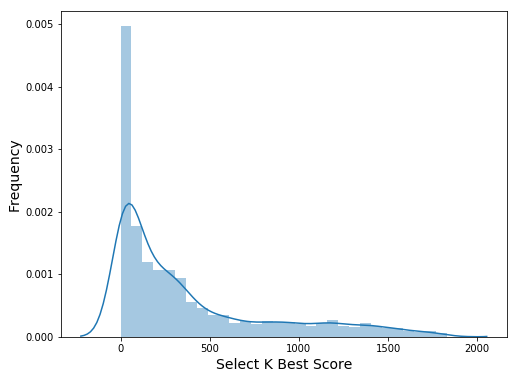

In [19]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.distplot(df_skb.score.values)
ax.set_xlabel("Select K Best Score",fontsize=14)
ax.set_ylabel("Frequency",fontsize=14)
#ax.xticks(fontsize = 13)
#ax.yticks(fontsize = 13)

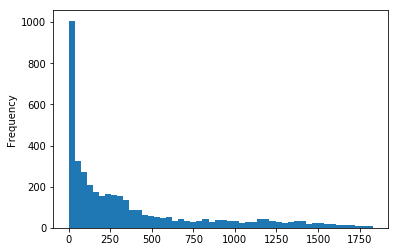

In [20]:
df_skb.score.plot(kind = 'hist', bins = 50)

In [21]:
df_skb.head()

,pixel_number,score
1336,1336,1830.027733
1158,1158,1814.436081
1094,1094,1813.303381
1273,1273,1810.632012
1400,1400,1807.782228


In [22]:
pixel_wanted = df_skb[df_skb.score >= 500]['pixel_number'].values.tolist()

In [23]:
len(pixel_wanted)

1068

In [ ]:
64*64

## logistic regression

In [ ]:
# lr = LogisticRegression()
# lr.fit(X_train,y_train)
# print('train score', lr.score(X_train, y_train))
# print('validation score', lr.score(X_validate, y_validate))
# print('test score', lr.score(X_test, y_test))

In [24]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train[:, pixel_wanted], y_train)
print('train score', lr.score(X_train[:, pixel_wanted], y_train))
print('validation score', lr.score(X_validate[:, pixel_wanted], y_validate))
print('test score', lr.score(X_test[:, pixel_wanted], y_test))

train score 0.8574854834637717
validation score 0.8277385159010601
test score 0.8303886925795053


In [25]:
recall_score(y_train, lr.predict(X_train[:, pixel_wanted]))

0.8422115627366826

In [26]:
recall_score(y_validate, lr.predict(X_validate[:, pixel_wanted]))

0.8091872791519434

### SGD logistic regression

In [27]:
from sklearn.linear_model import SGDClassifier

In [ ]:
# SGD = SGDClassifier()
# SGD.fit(X_train,y_train)
# print('train score', SGD.score(X_train, y_train))
# print('validation score', SGD.score(X_validate, y_validate))
# print('test score', SGD.score(X_test, y_test))

In [32]:
SGD = SGDClassifier(loss = 'log', random_state = 0)
SGD.fit(X_train[:, pixel_wanted],y_train)
print('train score', SGD.score(X_train[:, pixel_wanted], y_train))
print('validation score', SGD.score(X_validate[:, pixel_wanted], y_validate))
print('test score', SGD.score(X_test[:, pixel_wanted], y_test))

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


train score 0.8338803332491795
validation score 0.8118374558303887
test score 0.8180212014134276


In [ ]:
np.arange(0, 1.2, 0.2)

In [73]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

confusion_matrix(y_validate, SGD.predict(X_validate[:, pixel_wanted]))

array([[914, 218],
       [208, 924]])

In [74]:
print(classification_report(y_validate, SGD.predict(X_validate[:, pixel_wanted])))

             precision    recall  f1-score   support

          0       0.81      0.81      0.81      1132
          1       0.81      0.82      0.81      1132

avg / total       0.81      0.81      0.81      2264



In [75]:
recall_score(y_train, SGD.predict(X_train[:, pixel_wanted]))

0.8417066397374401

In [76]:
recall_score(y_validate, SGD.predict(X_validate[:, pixel_wanted]))

0.8162544169611308

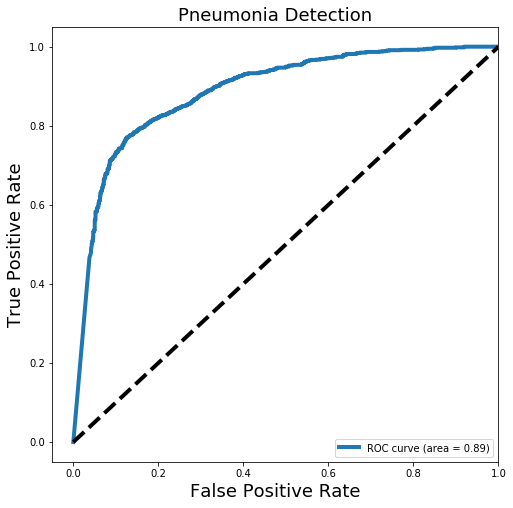

In [37]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_validate, SGD.predict_proba(X_validate[:, pixel_wanted])[:,1]) 
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[8,8])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Pneumonia Detection', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [43]:
from sklearn.model_selection import GridSearchCV
params = {'penalty': ['l1','l2'],
         'l1_ratio': np.arange(0, 1.1, 0.1)}

SGD2 = SGDClassifier(loss = 'log')
sgd_gs = GridSearchCV(SGD2, params, cv = 5, n_jobs = -1)

In [44]:
sgd_gs.fit(X_train[:, pixel_wanted],y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/anaconda3/lib/python3.6/site-packages/s

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/anaconda3/lib/python3.6/site-packages/s

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/anaconda3/lib/python3.6/site-packages/s

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/anaconda3/lib/python3.6/site-packages/s

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/anaconda3/lib/python3.6/site-packages/s

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/anaconda3/lib/python3.6/site-packages/s

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/anaconda3/lib/python3.6/site-packages/s

GridSearchCV(cv=5, error_score='raise',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'penalty': ['l1', 'l2'], 'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [45]:
sgd_gs.best_params_

{'l1_ratio': 0.7000000000000001, 'penalty': 'l1'}

In [46]:
sgd_gs.score(X_train[:, pixel_wanted], y_train)



0.8384246402423631

In [47]:
sgd_gs.score(X_validate[:, pixel_wanted], y_validate)

0.8193462897526502

In [48]:
recall_score(y_train, sgd_gs.predict(X_train[:, pixel_wanted]))

0.7811158798283262

In [50]:
recall_score(y_validate, sgd_gs.predict(X_validate[:, pixel_wanted]))

0.7606007067137809

## SVM (SGD)

In [52]:
SGD_SVM = SGDClassifier(loss = 'hinge')
SGD_SVM.fit(X_train[:, pixel_wanted],y_train)
print('train score', SGD_SVM.score(X_train[:, pixel_wanted], y_train))
print('validation score', SGD_SVM.score(X_validate[:, pixel_wanted], y_validate))
print('test score', SGD_SVM.score(X_test[:, pixel_wanted], y_test))

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


train score 0.8153244130270134
validation score 0.8003533568904594
test score 0.8030035335689046


In [53]:
recall_score(y_train, SGD_SVM.predict(X_train[:, pixel_wanted]))

0.6983085079525372

In [54]:
recall_score(y_validate, SGD_SVM.predict(X_validate[:, pixel_wanted]))

0.6828621908127208

## Random Forest

In [ ]:
# from sklearn.ensemble import RandomForestClassifier

# rfc = RandomForestClassifier()
# rfc.fit(X_train, y_train)
# print('train score', rfc.score(X_train, y_train))
# print('validation score', rfc.score(X_validate, y_validate))
# print('test score', rfc.score(X_test, y_test))

In [56]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train[:, pixel_wanted], y_train)
print('train score', rfc.score(X_train[:, pixel_wanted], y_train))
print('validation score', rfc.score(X_validate[:, pixel_wanted], y_validate))
print('test score', rfc.score(X_test[:, pixel_wanted], y_test))

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


train score 0.9910376167634436
validation score 0.838339222614841
test score 0.842756183745583


In [57]:
recall_score(y_train, rfc.predict(X_train[:, pixel_wanted]))

0.9853572330219641

In [58]:
recall_score(y_validate, rfc.predict(X_validate[:, pixel_wanted]))

0.7915194346289752

In [59]:
params = {'max_depth': [8],
          'max_features': [0.9]}

rf = RandomForestClassifier()
rf_gs = GridSearchCV(rf, params, cv = 5, n_jobs = -1)

In [60]:
rf_gs.fit(X_train[:, pixel_wanted], y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [8], 'max_features': [0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [61]:
rf_gs.best_params_

{'max_depth': 8, 'max_features': 0.9}

In [62]:
rf_gs.score(X_train[:, pixel_wanted], y_train)

0.9330977026003534

In [63]:
rf_gs.score(X_validate[:, pixel_wanted], y_validate)

0.8440812720848057

In [69]:
recall_score(y_train, rf_gs.predict(X_train[:, pixel_wanted]))

0.9123958596314062

In [70]:
recall_score(y_validate, rf_gs.predict(X_validate[:, pixel_wanted]))

0.8074204946996466

## CatBoost

In [64]:
from catboost import CatBoostClassifier, Pool, cv

In [65]:
from sklearn.metrics import accuracy_score

In [67]:
catboost = CatBoostClassifier(custom_loss=['Accuracy'])

catboost.fit(X_train[:, pixel_wanted], y_train)

0:	learn: 0.6752827	total: 1.11s	remaining: 18m 28s
1:	learn: 0.6588480	total: 1.52s	remaining: 12m 40s
2:	learn: 0.6436094	total: 1.81s	remaining: 10m 2s
3:	learn: 0.6284882	total: 2.1s	remaining: 8m 44s
4:	learn: 0.6163941	total: 2.4s	remaining: 7m 58s
5:	learn: 0.6041857	total: 2.69s	remaining: 7m 24s
6:	learn: 0.5917858	total: 2.97s	remaining: 7m 1s
7:	learn: 0.5802053	total: 3.26s	remaining: 6m 44s
8:	learn: 0.5704176	total: 3.55s	remaining: 6m 30s
9:	learn: 0.5604486	total: 3.83s	remaining: 6m 19s
10:	learn: 0.5504263	total: 4.12s	remaining: 6m 10s
11:	learn: 0.5418832	total: 4.41s	remaining: 6m 2s
12:	learn: 0.5333366	total: 4.76s	remaining: 6m 1s
13:	learn: 0.5253642	total: 5.07s	remaining: 5m 57s
14:	learn: 0.5175354	total: 5.37s	remaining: 5m 52s
15:	learn: 0.5104381	total: 5.66s	remaining: 5m 47s
16:	learn: 0.5039764	total: 5.99s	remaining: 5m 46s
17:	learn: 0.4974415	total: 6.31s	remaining: 5m 44s
18:	learn: 0.4910908	total: 6.64s	remaining: 5m 43s
19:	learn: 0.4860276	tota

159:	learn: 0.3120266	total: 50.5s	remaining: 4m 25s
160:	learn: 0.3116248	total: 50.8s	remaining: 4m 24s
161:	learn: 0.3112200	total: 51.2s	remaining: 4m 24s
162:	learn: 0.3110069	total: 51.5s	remaining: 4m 24s
163:	learn: 0.3104743	total: 51.8s	remaining: 4m 24s
164:	learn: 0.3098705	total: 52.1s	remaining: 4m 23s
165:	learn: 0.3096456	total: 52.5s	remaining: 4m 23s
166:	learn: 0.3093228	total: 52.8s	remaining: 4m 23s
167:	learn: 0.3089238	total: 53.1s	remaining: 4m 22s
168:	learn: 0.3087864	total: 53.4s	remaining: 4m 22s
169:	learn: 0.3082119	total: 53.7s	remaining: 4m 22s
170:	learn: 0.3079788	total: 54s	remaining: 4m 21s
171:	learn: 0.3075396	total: 54.2s	remaining: 4m 21s
172:	learn: 0.3072768	total: 54.5s	remaining: 4m 20s
173:	learn: 0.3069409	total: 54.8s	remaining: 4m 19s
174:	learn: 0.3067043	total: 55s	remaining: 4m 19s
175:	learn: 0.3061333	total: 55.3s	remaining: 4m 18s
176:	learn: 0.3058953	total: 55.6s	remaining: 4m 18s
177:	learn: 0.3055562	total: 55.9s	remaining: 4m 1

313:	learn: 0.2700687	total: 1m 35s	remaining: 3m 29s
314:	learn: 0.2700075	total: 1m 36s	remaining: 3m 29s
315:	learn: 0.2697886	total: 1m 36s	remaining: 3m 29s
316:	learn: 0.2696691	total: 1m 36s	remaining: 3m 28s
317:	learn: 0.2694390	total: 1m 37s	remaining: 3m 28s
318:	learn: 0.2691585	total: 1m 37s	remaining: 3m 28s
319:	learn: 0.2690737	total: 1m 37s	remaining: 3m 27s
320:	learn: 0.2689506	total: 1m 38s	remaining: 3m 27s
321:	learn: 0.2687837	total: 1m 38s	remaining: 3m 27s
322:	learn: 0.2685893	total: 1m 38s	remaining: 3m 26s
323:	learn: 0.2683367	total: 1m 39s	remaining: 3m 26s
324:	learn: 0.2680052	total: 1m 39s	remaining: 3m 26s
325:	learn: 0.2677333	total: 1m 39s	remaining: 3m 25s
326:	learn: 0.2674694	total: 1m 39s	remaining: 3m 25s
327:	learn: 0.2671615	total: 1m 40s	remaining: 3m 25s
328:	learn: 0.2669795	total: 1m 40s	remaining: 3m 24s
329:	learn: 0.2668760	total: 1m 40s	remaining: 3m 24s
330:	learn: 0.2666791	total: 1m 41s	remaining: 3m 24s
331:	learn: 0.2665727	total:

467:	learn: 0.2384255	total: 2m 21s	remaining: 2m 40s
468:	learn: 0.2381807	total: 2m 21s	remaining: 2m 40s
469:	learn: 0.2379186	total: 2m 22s	remaining: 2m 40s
470:	learn: 0.2378479	total: 2m 22s	remaining: 2m 39s
471:	learn: 0.2375907	total: 2m 22s	remaining: 2m 39s
472:	learn: 0.2374378	total: 2m 23s	remaining: 2m 39s
473:	learn: 0.2373623	total: 2m 23s	remaining: 2m 39s
474:	learn: 0.2373085	total: 2m 23s	remaining: 2m 38s
475:	learn: 0.2372881	total: 2m 23s	remaining: 2m 38s
476:	learn: 0.2371515	total: 2m 24s	remaining: 2m 38s
477:	learn: 0.2369430	total: 2m 24s	remaining: 2m 37s
478:	learn: 0.2368219	total: 2m 24s	remaining: 2m 37s
479:	learn: 0.2366747	total: 2m 25s	remaining: 2m 37s
480:	learn: 0.2366493	total: 2m 25s	remaining: 2m 36s
481:	learn: 0.2364489	total: 2m 25s	remaining: 2m 36s
482:	learn: 0.2362742	total: 2m 26s	remaining: 2m 36s
483:	learn: 0.2360377	total: 2m 26s	remaining: 2m 36s
484:	learn: 0.2359352	total: 2m 26s	remaining: 2m 35s
485:	learn: 0.2357560	total:

621:	learn: 0.2181424	total: 3m 8s	remaining: 1m 54s
622:	learn: 0.2180710	total: 3m 9s	remaining: 1m 54s
623:	learn: 0.2180699	total: 3m 9s	remaining: 1m 53s
624:	learn: 0.2178583	total: 3m 9s	remaining: 1m 53s
625:	learn: 0.2176879	total: 3m 9s	remaining: 1m 53s
626:	learn: 0.2174133	total: 3m 10s	remaining: 1m 53s
627:	learn: 0.2172937	total: 3m 10s	remaining: 1m 52s
628:	learn: 0.2171515	total: 3m 10s	remaining: 1m 52s
629:	learn: 0.2171083	total: 3m 10s	remaining: 1m 52s
630:	learn: 0.2170577	total: 3m 11s	remaining: 1m 51s
631:	learn: 0.2169893	total: 3m 11s	remaining: 1m 51s
632:	learn: 0.2169333	total: 3m 11s	remaining: 1m 51s
633:	learn: 0.2168905	total: 3m 12s	remaining: 1m 50s
634:	learn: 0.2168708	total: 3m 12s	remaining: 1m 50s
635:	learn: 0.2167704	total: 3m 12s	remaining: 1m 50s
636:	learn: 0.2166634	total: 3m 13s	remaining: 1m 50s
637:	learn: 0.2166218	total: 3m 13s	remaining: 1m 49s
638:	learn: 0.2165719	total: 3m 13s	remaining: 1m 49s
639:	learn: 0.2163939	total: 3m 1

773:	learn: 0.2037471	total: 3m 54s	remaining: 1m 8s
774:	learn: 0.2036653	total: 3m 55s	remaining: 1m 8s
775:	learn: 0.2035599	total: 3m 55s	remaining: 1m 7s
776:	learn: 0.2034869	total: 3m 55s	remaining: 1m 7s
777:	learn: 0.2033557	total: 3m 56s	remaining: 1m 7s
778:	learn: 0.2033278	total: 3m 56s	remaining: 1m 7s
779:	learn: 0.2032774	total: 3m 56s	remaining: 1m 6s
780:	learn: 0.2032595	total: 3m 56s	remaining: 1m 6s
781:	learn: 0.2032347	total: 3m 57s	remaining: 1m 6s
782:	learn: 0.2030162	total: 3m 57s	remaining: 1m 5s
783:	learn: 0.2030149	total: 3m 57s	remaining: 1m 5s
784:	learn: 0.2029990	total: 3m 58s	remaining: 1m 5s
785:	learn: 0.2028941	total: 3m 58s	remaining: 1m 4s
786:	learn: 0.2028718	total: 3m 59s	remaining: 1m 4s
787:	learn: 0.2028410	total: 3m 59s	remaining: 1m 4s
788:	learn: 0.2027836	total: 4m	remaining: 1m 4s
789:	learn: 0.2026854	total: 4m	remaining: 1m 3s
790:	learn: 0.2026421	total: 4m	remaining: 1m 3s
791:	learn: 0.2025710	total: 4m 1s	remaining: 1m 3s
792:	l

929:	learn: 0.1906695	total: 4m 44s	remaining: 21.4s
930:	learn: 0.1906095	total: 4m 44s	remaining: 21.1s
931:	learn: 0.1904114	total: 4m 45s	remaining: 20.8s
932:	learn: 0.1903950	total: 4m 45s	remaining: 20.5s
933:	learn: 0.1902315	total: 4m 45s	remaining: 20.2s
934:	learn: 0.1902031	total: 4m 45s	remaining: 19.9s
935:	learn: 0.1901641	total: 4m 46s	remaining: 19.6s
936:	learn: 0.1901481	total: 4m 46s	remaining: 19.3s
937:	learn: 0.1901436	total: 4m 46s	remaining: 18.9s
938:	learn: 0.1901244	total: 4m 46s	remaining: 18.6s
939:	learn: 0.1900049	total: 4m 47s	remaining: 18.3s
940:	learn: 0.1899433	total: 4m 47s	remaining: 18s
941:	learn: 0.1899156	total: 4m 47s	remaining: 17.7s
942:	learn: 0.1898568	total: 4m 47s	remaining: 17.4s
943:	learn: 0.1897552	total: 4m 48s	remaining: 17.1s
944:	learn: 0.1895375	total: 4m 48s	remaining: 16.8s
945:	learn: 0.1895193	total: 4m 48s	remaining: 16.5s
946:	learn: 0.1894012	total: 4m 49s	remaining: 16.2s
947:	learn: 0.1893654	total: 4m 49s	remaining: 1

In [68]:
print('train score', catboost.score(X_train[:, pixel_wanted], y_train))
print('validation score', catboost.score(X_validate[:, pixel_wanted], y_validate))
print('test score', catboost.score(X_test[:, pixel_wanted], y_test))

train score 0.9390305478414542
validation score 0.8643992932862191
test score 0.8604240282685512


In [71]:
recall_score(y_train, catboost.predict(X_train[:, pixel_wanted]))

0.9247664731128503

In [72]:
recall_score(y_validate, catboost.predict(X_validate[:, pixel_wanted]))

0.8409893992932862

In [ ]:
test_proba = catboost.predict_proba(X_test[:, pixel_wanted])

In [ ]:
test_proba

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, test_proba[:,1]) 
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[8,8])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Pneumonia Detection', fontsize=18)
plt.legend(loc="lower right")
plt.show()